In [1]:
import matplotlib.pyplot as plt

START_TIME = 1.0
BW = 100e9

In [2]:
def getPctl(a, p):
    i = int(len(a) * p)
    return a[i]

In [3]:
def readQueueLog(filename):
  times = []
  q_sizes = []
  with open(filename, 'r') as f:
    for line in f:
      queue_log = line.split()
      time = float(queue_log[0])*1e-9 - START_TIME # in seconds
      q_size = float(queue_log[1]) * 8.0 / BW * 1e6 # in usec

      times.append(time)
      q_sizes.append(q_size)

  retval = {}
  retval['times'] = times
  retval['q_sizes'] = q_sizes
  return retval

In [5]:
workload = 'Google_RPC_readBatch'
# workload = 'Facebook_Hadoop'
load = 0.6
simIdx = 0

trace_path = 'outputs/bolt-utilization/'
trace_path += workload + '_load-' + str(int(load*100)) + 'p_' + str(simIdx) + '_'
trace_path += 'MSGAGG_'

bolt_q_log_filename = trace_path + 'DEFAULT.qlen'
bolt_q_log = readQueueLog(bolt_q_log_filename)
bolt_q_sizes_all = sorted(bolt_q_log['q_sizes'])

swift_q_log_filename = trace_path + 'SWIFT.qlen'
swift_q_log = readQueueLog(swift_q_log_filename)
swift_q_sizes_all = sorted(swift_q_log['q_sizes'])

bolt_noff_nosm_nopru_q_log_filename = trace_path + 'NOFF_DEFAULT.qlen'
bolt_noff_nosm_nopru_q_log = readQueueLog(bolt_noff_nosm_nopru_q_log_filename)
bolt_noff_nosm_nopru_q_sizes_all = sorted(bolt_noff_nosm_nopru_q_log['q_sizes'])

bolt_noff_nosm_q_log_filename = trace_path + 'NOFF_DEFAULT_PRU.qlen'
bolt_noff_nosm_q_log = readQueueLog(bolt_noff_nosm_q_log_filename)
bolt_noff_nosm_q_sizes_all = sorted(bolt_noff_nosm_q_log['q_sizes'])

bolt_noff_q_log_filename = trace_path + 'NOFF_DEFAULT_ABS_PRU.qlen'
bolt_noff_q_log = readQueueLog(bolt_noff_q_log_filename)
bolt_noff_q_sizes_all = sorted(bolt_noff_q_log['q_sizes'])

bolt_noff_insttok_q_log_filename = trace_path + 'NOFF_DEFAULT_ABS_PRU_INSTTOK.qlen'
bolt_noff_insttok_q_log = readQueueLog(bolt_noff_insttok_q_log_filename)
bolt_noff_insttok_q_sizes_all = sorted(bolt_noff_insttok_q_log['q_sizes'])

In [6]:
percentiles = [0.5, 0.9, 0.99, 0.999]
for percentile in percentiles:
  print('{}%ile queue size:'.format(percentile*100))

  bolt_tail_q_usec = getPctl(bolt_q_sizes_all, percentile)
  print('\tBolt: {:.3f}usec'.format(bolt_tail_q_usec))

  swift_tail_q_usec = getPctl(swift_q_sizes_all, percentile)
  print('\tSwift: {:.3f}usec'.format(swift_tail_q_usec))

  bolt_noff_nosm_nopru_tail_q_usec = getPctl(bolt_noff_nosm_nopru_q_sizes_all, percentile)
  print('\tBolt (w/o ff & sm & pru): {:.3f}usec'.format(bolt_noff_nosm_nopru_tail_q_usec))

  bolt_noff_nosm_tail_q_usec = getPctl(bolt_noff_nosm_q_sizes_all, percentile)
  print('\tBolt (w/o ff & sm): {:.3f}usec'.format(bolt_noff_nosm_tail_q_usec))

  bolt_noff_tail_q_usec = getPctl(bolt_noff_q_sizes_all, percentile)
  print('\tBolt (w/o ff): {:.3f}usec'.format(bolt_noff_tail_q_usec))

  bolt_noff_insttok_tail_q_usec = getPctl(bolt_noff_insttok_q_sizes_all, percentile)
  print('\tBolt (w/o ff w/ insttok): {:.3f}usec'.format(bolt_noff_insttok_tail_q_usec))

50.0%ile queue size:
	Bolt: 0.840usec
	Swift: 10.080usec
	Bolt (w/o ff & sm & pru): 0.360usec
	Bolt (w/o ff & sm): 0.360usec
	Bolt (w/o ff): 0.600usec
	Bolt (w/o ff w/ insttok): 30.570usec
90.0%ile queue size:
	Bolt: 2.280usec
	Swift: 14.760usec
	Bolt (w/o ff & sm & pru): 1.080usec
	Bolt (w/o ff & sm): 1.200usec
	Bolt (w/o ff): 1.320usec
	Bolt (w/o ff w/ insttok): 38.901usec
99.0%ile queue size:
	Bolt: 4.560usec
	Swift: 19.353usec
	Bolt (w/o ff & sm & pru): 2.400usec
	Bolt (w/o ff & sm): 2.640usec
	Bolt (w/o ff): 2.900usec
	Bolt (w/o ff w/ insttok): 49.003usec
99.9%ile queue size:
	Bolt: 6.960usec
	Swift: 23.942usec
	Bolt (w/o ff & sm & pru): 3.776usec
	Bolt (w/o ff & sm): 4.200usec
	Bolt (w/o ff): 4.680usec
	Bolt (w/o ff w/ insttok): 56.664usec


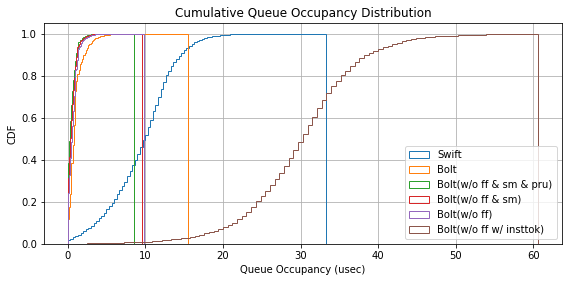

In [7]:
plt.figure(figsize=(8,4))

plt.hist(swift_q_sizes_all, bins = 100, cumulative=True, density=True, 
         histtype='step', label='Swift')
plt.hist(bolt_q_sizes_all, bins = 100, cumulative=True, density=True, 
         histtype='step', label='Bolt')
plt.hist(bolt_noff_nosm_nopru_q_sizes_all, bins = 100, cumulative=True, density=True, 
         histtype='step', label='Bolt(w/o ff & sm & pru)')
plt.hist(bolt_noff_nosm_q_sizes_all, bins = 100, cumulative=True, density=True, 
         histtype='step', label='Bolt(w/o ff & sm)')
plt.hist(bolt_noff_q_sizes_all, bins = 100, cumulative=True, density=True, 
         histtype='step', label='Bolt(w/o ff)')
plt.hist(bolt_noff_insttok_q_sizes_all, bins = 100, cumulative=True, density=True, 
         histtype='step', label='Bolt(w/o ff w/ insttok)')
plt.legend(loc='lower right')
plt.xlabel('Queue Occupancy (usec)')
plt.ylabel('CDF')
plt.title('Cumulative Queue Occupancy Distribution')
plt.grid()
plt.tight_layout()

plt.show()

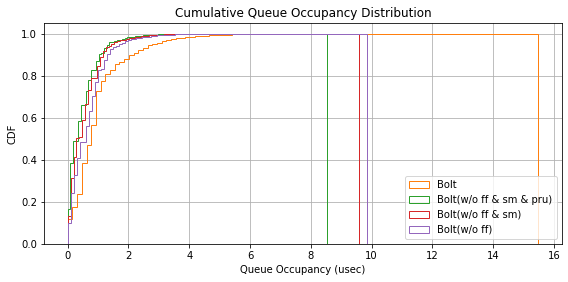

In [10]:
plt.figure(figsize=(8,4))

plt.hist(bolt_q_sizes_all, bins = 100, cumulative=True, density=True, 
         histtype='step', label='Bolt', color='C1')
plt.hist(bolt_noff_nosm_nopru_q_sizes_all, bins = 100, cumulative=True, density=True, 
         histtype='step', label='Bolt(w/o ff & sm & pru)', color='C2')
plt.hist(bolt_noff_nosm_q_sizes_all, bins = 100, cumulative=True, density=True, 
         histtype='step', label='Bolt(w/o ff & sm)', color='C3')
plt.hist(bolt_noff_q_sizes_all, bins = 100, cumulative=True, density=True, 
         histtype='step', label='Bolt(w/o ff)', color='C4')
plt.legend(loc='lower right')
plt.xlabel('Queue Occupancy (usec)')
plt.ylabel('CDF')
plt.title('Cumulative Queue Occupancy Distribution')
plt.grid()
plt.tight_layout()

plt.show()

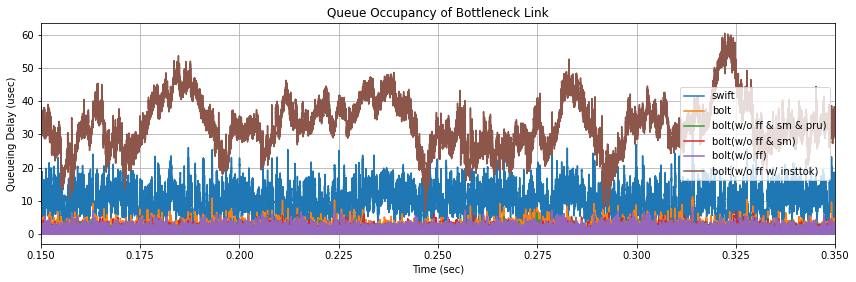

In [11]:
plt.figure(figsize=(12,4))
plt.plot(swift_q_log['times'], swift_q_log['q_sizes'], label='swift')
plt.plot(bolt_q_log['times'], bolt_q_log['q_sizes'], label='bolt')
plt.plot(bolt_noff_nosm_nopru_q_log['times'], bolt_noff_nosm_nopru_q_log['q_sizes'], label='bolt(w/o ff & sm & pru)')
plt.plot(bolt_noff_nosm_q_log['times'], bolt_noff_nosm_q_log['q_sizes'], label='bolt(w/o ff & sm)')
plt.plot(bolt_noff_q_log['times'], bolt_noff_q_log['q_sizes'], label='bolt(w/o ff)')
plt.plot(bolt_noff_insttok_q_log['times'], bolt_noff_insttok_q_log['q_sizes'], label='bolt(w/o ff w/ insttok)')
plt.xlim([0.15,0.35])
plt.legend(loc='right')
plt.title("Queue Occupancy of Bottleneck Link")
plt.xlabel('Time (sec)')
plt.ylabel('Queueing Delay (usec)')
plt.grid()
plt.tight_layout()
plt.show()